In [1]:
import tensorflow.keras as keras
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import os

In [2]:
print(os.listdir("/content"))

['.config', 'diabetes.csv', 'sample_data']


In [3]:
ds = pd.read_csv('/content/diabetes.csv')

In [5]:
print(ds.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [6]:
ds.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
columns = ds.columns

In [8]:
print(columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

def HeatMap(df,x=True):
        correlations = ds.corr()
        ## Create color map ranging between two colors
        cmap = sns.diverging_palette(220, 10, as_cmap=True)
        fig, ax = plt.subplots(figsize=(10, 10))
        fig = sns.heatmap(correlations, cmap=cmap, vmax=1.0, center=0, fmt='.2f',square=True, linewidths=.5, annot=x, cbar_kws={"shrink": .75})
        fig.set_xticklabels(fig.get_xticklabels(), rotation = 90, fontsize = 10)
        fig.set_yticklabels(fig.get_yticklabels(), rotation = 0, fontsize = 10)
        plt.tight_layout()
        plt.show()


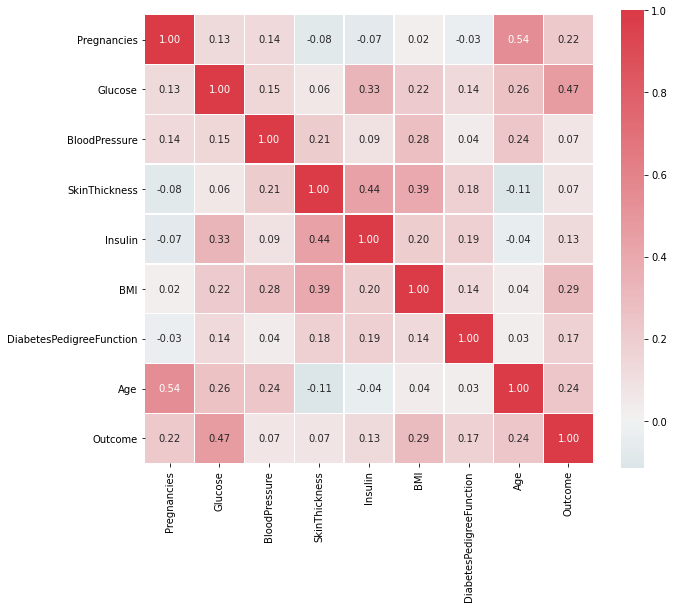

In [10]:
HeatMap(ds, x=True)

In [11]:
input = ds[columns[0:8]]
label = ds[columns[-1]]

In [12]:
print(input[0:5])

   Pregnancies  Glucose  BloodPressure  ...   BMI  DiabetesPedigreeFunction  Age
0            6      148             72  ...  33.6                     0.627   50
1            1       85             66  ...  26.6                     0.351   31
2            8      183             64  ...  23.3                     0.672   32
3            1       89             66  ...  28.1                     0.167   21
4            0      137             40  ...  43.1                     2.288   33

[5 rows x 8 columns]


In [13]:
x_train, x_test,  y_train, y_test = train_test_split(input, label, train_size=0.8, shuffle=True)

In [14]:
print(x_train.shape, y_train.shape)

(614, 8) (614,)


In [15]:
print(x_test.shape, y_test.shape)

(154, 8) (154,)


In [16]:
ip = x_train.values
op = y_train.values

eval_ip = x_test.values
eval_op = y_test.values

In [17]:
print(ip.shape)
print(op.shape)

print(eval_ip.shape)
print(eval_op.shape)

(614, 8)
(614,)
(154, 8)
(154,)


In [18]:
from sklearn import preprocessing

In [19]:
scaler = preprocessing.StandardScaler()
ip_scaled = scaler.fit_transform(ip)
eval_ip_scaled = scaler.fit_transform(eval_ip)

In [ ]:
print(ip_scaled[0])

[ 0.65992083 -0.11076479  1.38271078 -1.30834356 -0.68415551 -0.4457248
 -0.95692187 -0.25432499]


In [20]:
print(op.shape)
print(eval_op.shape)

(614,)
(154,)


In [21]:
op_edims = np.expand_dims(op, axis=-1)
eval_op_edims = np.expand_dims(eval_op, axis=-1)

In [22]:
print(eval_op_edims.shape)
print(op_edims.shape)

(154, 1)
(614, 1)


In [ ]:
print(ip_scaled[0:10])

[[ 0.63994726  0.84832379  0.14964075  0.90726993 -0.69289057  0.20401277
   0.46849198  1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575  0.53090156 -0.69289057 -0.68442195
  -0.36506078 -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 -1.28821221 -0.69289057 -1.10325546
   0.60439732 -0.10558415]
 [-0.84488505 -0.99820778 -0.16054575  0.15453319  0.12330164 -0.49404308
  -0.92076261 -1.04154944]
 [-1.14185152  0.5040552  -1.50468724  0.90726993  0.76583594  1.4097456
   5.4849091  -0.0204964 ]
 [ 0.3429808  -0.15318486  0.25303625 -1.28821221 -0.69289057 -0.81134119
  -0.81807858 -0.27575966]
 [-0.25095213 -1.34247638 -0.98770975  0.71908574  0.07120427 -0.12597727
  -0.676133   -0.61611067]
 [ 1.82781311 -0.184482   -3.57259724 -1.28821221 -0.69289057  0.41977549
  -1.02042653 -0.36084741]
 [-0.54791859  2.38188392  0.04624525  1.53455054  4.02192191 -0.18943689
  -0.94794368  1.68125866]
 [ 1.23388019  0.12848945  1.39038675 -1.28821221 -0.69289057 -4.06047387
  -0.7244549   1.7

In [50]:
model = keras.Sequential([
                          keras.layers.Dense(8, activation='relu'),
                          keras.layers.Dense(1024, activation='relu'),
                          keras.layers.Dense(1, activation='sigmoid')
])

In [51]:
model.compile(optimizer=keras.optimizers.SGD(0.005),metrics='accuracy', loss=keras.losses.BinaryCrossentropy())

In [52]:
hist = model.fit(x=ip_scaled, y=op_edims,batch_size=16,epochs=1000)

Epoch 1/1000
39/39 [==============================] - 0s 2ms/step - loss: 0.6881 - accuracy: 0.5586
Epoch 2/1000
39/39 [==============================] - 0s 2ms/step - loss: 0.6701 - accuracy: 0.6368
Epoch 3/1000
39/39 [==============================] - 0s 2ms/step - loss: 0.6563 - accuracy: 0.6531
Epoch 4/1000
39/39 [==============================] - 0s 2ms/step - loss: 0.6448 - accuracy: 0.6531
Epoch 5/1000
39/39 [==============================] - 0s 2ms/step - loss: 0.6354 - accuracy: 0.6531
Epoch 6/1000
39/39 [==============================] - 0s 2ms/step - loss: 0.6281 - accuracy: 0.6531
Epoch 7/1000
39/39 [==============================] - 0s 2ms/step - loss: 0.6211 - accuracy: 0.6531
Epoch 8/1000
39/39 [==============================] - 0s 2ms/step - loss: 0.6151 - accuracy: 0.6531
Epoch 9/1000
39/39 [==============================] - 0s 2ms/step - loss: 0.6097 - accuracy: 0.6531
Epoch 10/1000
39/39 [==============================] - 0s 2ms/step - loss: 0.6047 - accuracy: 0.6531

In [53]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_18 (Dense)             (None, 128)               1152      
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 129       
Total params: 1,353
Trainable params: 1,353
Non-trainable params: 0
_________________________________________________________________


In [54]:
print(hist.history.keys())

dict_keys(['loss', 'accuracy'])


In [55]:
from matplotlib import pyplot as plt

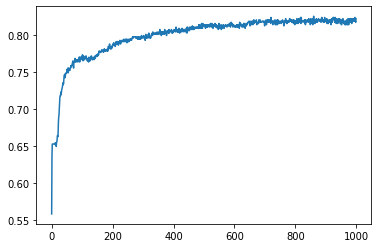

In [56]:
plt.plot(hist.history['accuracy'])

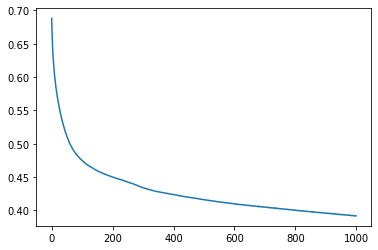

In [57]:
plt.plot(hist.history['loss'])

In [58]:
x_v = ip_scaled[10]
print(ip_scaled[10].shape)
x_v = np.expand_dims(x_v, axis = 0)

(8,)


In [59]:
print(x_v.shape)

(1, 8)


In [60]:
model.predict(x_v)

array([[0.09649262]], dtype=float32)

In [61]:
print(op_edims[102])

[0]
